In [155]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

from tensorflow import keras

print(f'Keras:{keras.__version__}')  # version

Keras:2.11.0


In [156]:
dt_cifar10 = keras.datasets.cifar10

### Classes da Base *Cifar10*
```json
{
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}
```

In [157]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

### Carregendo a base para treinamento

In [158]:
(X_train_full, y_train_full), (X_test, y_test) = dt_cifar10.load_data()

### Detalhes e informações da Base de dados

In [159]:
print(f'Dataset shape:{X_train_full.shape}')

print(f'First instance shape:{X_train_full[0].shape}')
print(f'\nFirst instance:\n {X_train_full[0]}')

Dataset shape:(50000, 32, 32, 3)
First instance shape:(32, 32, 3)

First instance:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


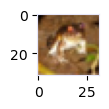

In [160]:
fig = plt.figure(figsize=(0.8, 0.8))
fig = plt.imshow(X_train_full[0], cmap=plt.cm.gray)
plt.show()

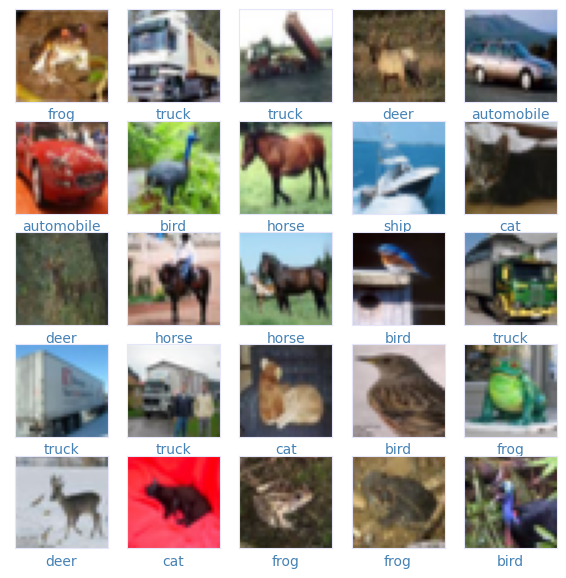

In [161]:
plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(7, 7))

for i in range(25):  # First 25 instances
    plt.subplot(5, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train_full[i], cmap=plt.cm.gray)

    plt.xlabel(class_names[y_train_full[i][0]], color='steelblue')

plt.show()

## Normalizando os dados da imagem

In [162]:
X_valid, X_train = X_train_full[:15000] / 255.0, X_train_full[15000:] / 255.0
y_valid, y_train = y_train_full[:15000], y_train_full[15000:]

print(X_train_full.shape)

(50000, 32, 32, 3)


## Criando o model com Keras

In [163]:
kernel = (3, 3)  # kernel size of 3x3
pool = (2, 2)  # pool size 2x2

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel, padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.50),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### compilando o model com o optimizador Adam
- learning rate = *1e-3*
- loss *sparse_categorical_crossentropy*
- metrica *sparse_categorical_accuracy*

In [164]:
from keras.optimizers import Adam

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(learning_rate=1e-3),
                metrics=['sparse_categorical_accuracy'])

In [165]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

## treinando o Modelo

In [166]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    steps_per_epoch=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
100/100 [==============================] - 102s 1s/step - loss: 2.1895 - sparse_categorical_accuracy: 0.1737 - val_loss: 1.9004 - val_sparse_categorical_accuracy: 0.3092
Epoch 2/10
100/100 [==============================] - 118s 1s/step - loss: 1.7011 - sparse_categorical_accuracy: 0.3698 - val_loss: 1.5126 - val_sparse_categorical_accuracy: 0.4342
Epoch 3/10
100/100 [==============================] - 101s 1s/step - loss: 1.4850 - sparse_categorical_accuracy: 0.4523 - val_loss: 1.3252 - val_sparse_categorical_accuracy: 0.5084
Epoch 4/10
100/100 [==============================] - 105s 1s/step - loss: 1.3369 - sparse_categorical_accuracy: 0.5111 - val_loss: 1.1799 - val_sparse_categorical_accuracy: 0.5735
Epoch 5/10
100/100 [==============================] - 116s 1s/step - loss: 1.2003 - sparse_categorical_accuracy: 0.5734 - val_loss: 1.0661 - val_sparse_categorical_accuracy: 0.6213
Epoch 6/10
100/100 [==============================] - 122s 1s/step - loss: 1.0914 - sparse_cate

### Salvando o Modelo treinado

In [167]:
model.save_weights('/Users/semicheche/Redes neurais/modelo_cnn_keras_t2.h5', overwrite=True)

### historico de treinamento

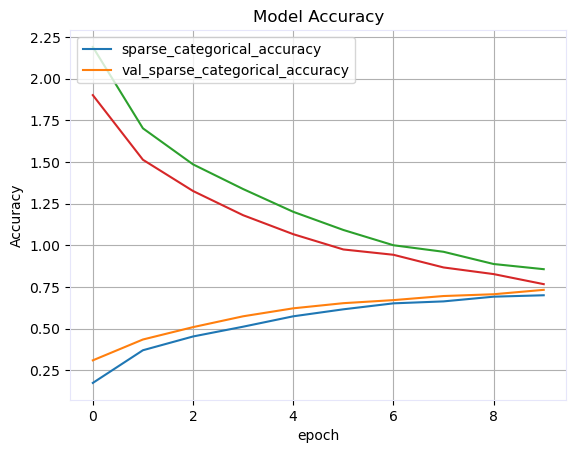

In [168]:
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('epoch')

plt.legend(['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'], loc='upper left')

plt.show()

In [169]:
test_loss, test_acc = model.evaluate(X_valid,  y_valid, verbose=2)
print(f'Loss: {test_loss}')
print(f'Accuracy: {test_acc}')

469/469 - 15s - loss: 0.7663 - sparse_categorical_accuracy: 0.7321 - 15s/epoch - 32ms/step
Loss: 0.7662653923034668
Accuracy: 0.7321333289146423


In [170]:
from IPython import display
from PIL import Image


import numpy as np

# pegando uma imagem da internet para Validar o Modelo

url (https://cdn.auckland.ac.nz/aem/content/auckland/en/education/about-the-faculty/facilities/car-parking/jcr:content/leftpar/imagecomponent/image.img.1024.medium.jpg/1539642515007.jpg)

Image size:(576, 1024, 3)


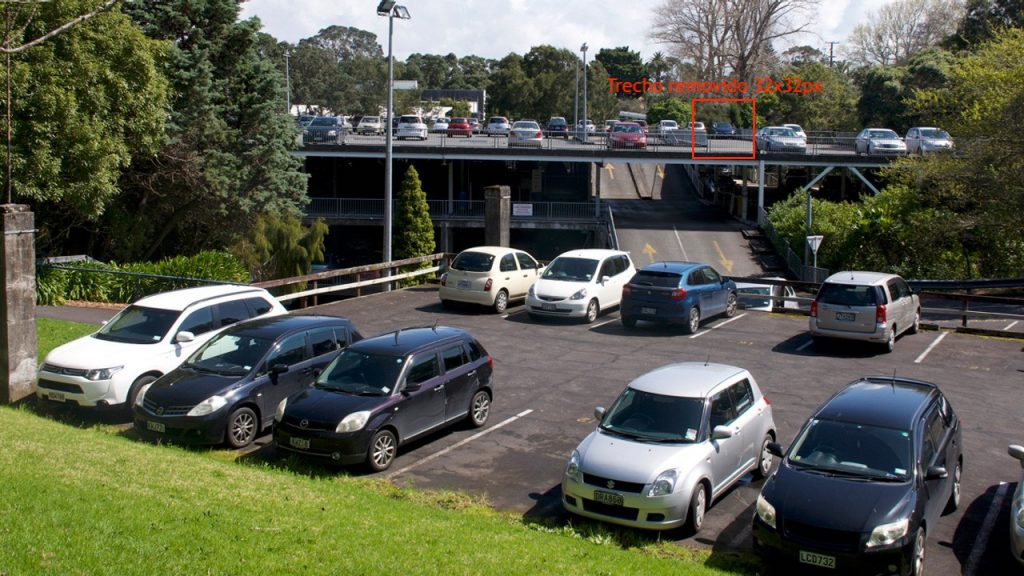

In [171]:
img_origin = '/Users/semicheche/Redes neurais/img_original.jpeg'

with open(img_origin, 'rb') as f:
    np_image_string = np.array([f.read()])

image = Image.open(img_origin)

width, height = image.size

# Convert the image data into a NumPy array
np_image = np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

print(f'Image size:{np_image.shape}')


display.display(display.Image(img_origin, width=1024))

Image size:(32, 32, 3)


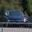

In [172]:

image_name = '/Users/semicheche/Redes neurais/cars.jpeg'

with open(image_name, 'rb') as f:
    np_image_string = np.array([f.read()])

image = Image.open(image_name)

width, height = image.size

# Convert the image data into a NumPy array
np_image = np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

print(f'Image size:{np_image.shape}')

display.display(display.Image(image_name, width=320))


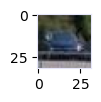

In [173]:
fig = plt.figure(figsize=(0.7, 0.7))
fig = plt.imshow(np_image, cmap=plt.cm.gray)
plt.show()

### Normalizando a Imagem 

In [174]:
norm_img = np_image / 255.0


### Por algum motivo o tensorflow reclamou e foi preciso adicionar mais um dimensão a imagem

In [175]:
import tensorflow as tf
image_data = tf.expand_dims(norm_img, axis=0)

print(image_data.shape)
print(image_data)


(1, 32, 32, 3)
tf.Tensor(
[[[[0.21176471 0.18823529 0.1254902 ]
   [0.27058824 0.24705882 0.18431373]
   [0.31372549 0.29019608 0.22745098]
   ...
   [0.28235294 0.34117647 0.22745098]
   [0.2627451  0.31764706 0.18823529]
   [0.25882353 0.31372549 0.17647059]]

  [[0.23529412 0.21568627 0.14117647]
   [0.29411765 0.2745098  0.2       ]
   [0.3372549  0.31764706 0.24313725]
   ...
   [0.27058824 0.32941176 0.21568627]
   [0.2627451  0.31764706 0.18823529]
   [0.25882353 0.31372549 0.17647059]]

  [[0.20784314 0.2        0.11764706]
   [0.2627451  0.25490196 0.17254902]
   [0.31372549 0.30588235 0.22352941]
   ...
   [0.25882353 0.31764706 0.20392157]
   [0.25098039 0.30588235 0.17647059]
   [0.22745098 0.28235294 0.14509804]]

  ...

  [[0.63137255 0.65098039 0.6745098 ]
   [0.52941176 0.54901961 0.57254902]
   [0.40392157 0.40784314 0.42745098]
   ...
   [0.60392157 0.59607843 0.61568627]
   [0.66666667 0.64705882 0.67058824]
   [0.6        0.59215686 0.61176471]]

  [[0.65490196 0.67

### Fazendo a predição da imagem

In [176]:

y_proba = model.predict(image_data)

print(f'Probability scores:\n {y_proba.round(2)}')
print(f'Resultado: {class_names[y_proba.argmax()]}')

1/1 [==============================] - 0s 169ms/step
Probability scores:
 [[0.14 0.04 0.1  0.04 0.02 0.01 0.04 0.   0.46 0.15]]
Resultado: ship


# Conclusão

- Conclui se que com o dropout o Modelo tem uma acuracia de `46%` e a porcentagen de acerto, e na predição ele teve `65%` de certeza do objeto e de `14%` que a imagem era um sapo. Nesse caso o `Droptout`

### teste com um veiculo novo(nova Montana)

Image size:(32, 32, 3)


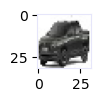

In [177]:
image_car2 = '/Users/semicheche/Redes neurais/montana.jpeg'

with open(image_car2, 'rb') as f:
    np_image_string = np.array([f.read()])

image1 = Image.open(image_car2)

width, height = image1.size

# Convert the image data into a NumPy array
np_car = np.array(image1.getdata()).reshape(height, width, 3).astype(np.uint8)

print(f'Image size:{np_car.shape}')

fig = plt.figure(figsize=(0.7, 0.7))
fig = plt.imshow(np_car, cmap=plt.cm.gray)
plt.show()

In [178]:
np_car = np_car / 255.0

In [179]:
image_car2 = tf.expand_dims(np_car, axis=0)

In [180]:
y_proba1 = model.predict(image_car2)

print(f'Probability scores:\n {y_proba1.round(2)}')
print(f'Resultado: {class_names[y_proba1.argmax()]}')

1/1 [==============================] - 0s 47ms/step
Probability scores:
 [[0.   0.93 0.   0.   0.   0.   0.   0.   0.   0.07]]
Resultado: automobile


In [181]:
X_test_norm = X_test / 255.0

X_test_norm.shape

(10000, 32, 32, 3)

In [182]:
y_proba_full = model.predict(X_test_norm)

print(f'Probability scores:\n {y_proba_full.round(2)}')
print(f'Resultado: {class_names[y_proba_full[0].argmax()]}')

313/313 [==============================] - 10s 33ms/step
Probability scores:
 [[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.64 0.   ... 0.   0.35 0.01]
 [0.26 0.02 0.01 ... 0.   0.68 0.01]
 ...
 [0.   0.   0.01 ... 0.01 0.   0.  ]
 [0.43 0.04 0.11 ... 0.06 0.1  0.  ]
 [0.   0.   0.   ... 0.95 0.   0.  ]]
Resultado: cat


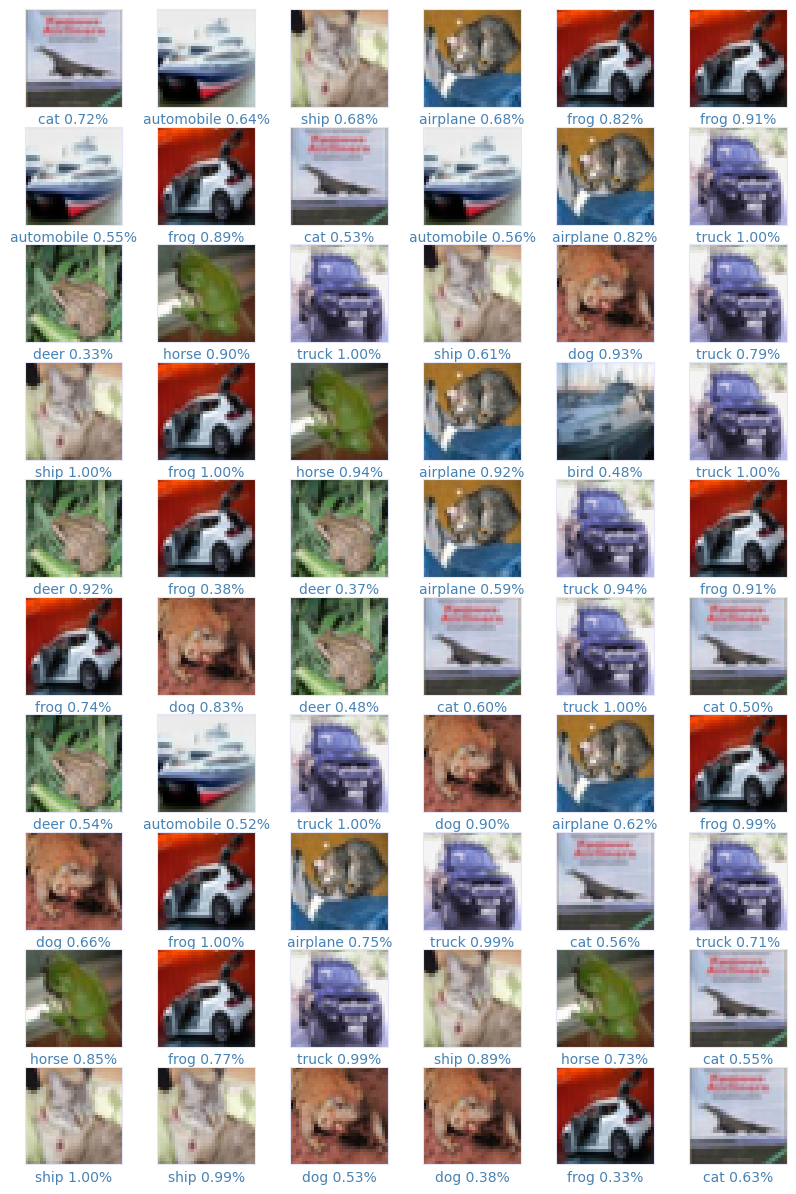

In [187]:
plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(10, 15))

for i in range(60):  # First 50 instances
    plt.subplot(10, 6, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_test[y_proba_full[i].argmax()], cmap=plt.cm.gray)

    plt.xlabel(f'{class_names[y_proba_full[i].argmax()]} {y_proba_full[i][y_proba_full[i].argmax()]:.2f}%', color='steelblue')

plt.show()